In [953]:
import	pandas	as	pd
import	numpy	as	np
import	matplotlib.pyplot	as	plt
import torch
import torch.nn as nn
from sklearn.metrics import mean_absolute_error

In [954]:
data=pd.read_excel('C:\github_project_vscode\etri\data.xls')
data.head()

,Part Number,D일06~08(08)H 투입계획(발주) 수량,D일08~10(10)H 투입계획(발주) 수량,D일10~12(13)H 투입계획(발주) 수량,D일13~15(15)H 투입계획(발주) 수량,D일15~17(18)H 투입계획(발주) 수량,D일18~20(21)H 투입계획(발주) 수량,D일21~23(23)H 투입계획(발주) 수량,D일23~01(02)H 투입계획(발주) 수량,D일 02~04H 투입계획 수량,...,D+23일 투입예정 수량,D+24일 투입예정 수량,D+25일 투입예정 수량,D+26일 투입예정 수량,D+27일 투입예정 수량,D+28일 투입예정 수량,D+29일 투입예정 수량,D+30일 투입예정 수량,D+31~D+45일 투입예정 수량,CRET_TIME
0,Part 0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202109131830
1,Part 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202109131830
2,Part 2,139,60,80,76,68,81,68,44,0,...,0,0,0,0,0,0,0,0,0,202109131830
3,Part 3,15,11,17,13,12,16,12,8,0,...,0,0,0,0,0,0,0,0,0,202109131830
4,Part 4,40,27,29,17,18,29,18,9,0,...,0,0,0,0,0,0,0,0,0,202109131830


In [955]:
data_94 = data[(data["Part Number"]=='Part 94')]
data_95 = data[(data["Part Number"]=='Part 95')]
data_94.reset_index(drop=True,	inplace=True)
data_95.reset_index(drop=True,	inplace=True)

In [956]:
data_94.describe()

,D일06~08(08)H 투입계획(발주) 수량,D일08~10(10)H 투입계획(발주) 수량,D일10~12(13)H 투입계획(발주) 수량,D일13~15(15)H 투입계획(발주) 수량,D일15~17(18)H 투입계획(발주) 수량,D일18~20(21)H 투입계획(발주) 수량,D일21~23(23)H 투입계획(발주) 수량,D일23~01(02)H 투입계획(발주) 수량,D일 02~04H 투입계획 수량,D일 04~06H 투입계획 수량,...,D+23일 투입예정 수량,D+24일 투입예정 수량,D+25일 투입예정 수량,D+26일 투입예정 수량,D+27일 투입예정 수량,D+28일 투입예정 수량,D+29일 투입예정 수량,D+30일 투입예정 수량,D+31~D+45일 투입예정 수량,CRET_TIME
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0,153.0,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0,153.0,1.530000e+02
mean,12.686275,3.372549,3.960784,3.254902,3.254902,3.797386,3.444444,2.411765,0.0,0.0,...,3.738562,3.477124,3.712418,1.457516,1.267974,1.294118,0.941176,0.0,0.0,2.021098e+11
std,6.156373,1.609521,1.669708,1.519736,1.519736,1.836614,1.681513,1.388531,0.0,0.0,...,10.032035,9.946624,10.168109,5.663813,5.878156,5.997678,4.318314,0.0,0.0,4.601011e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.021091e+11
25%,9.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.021093e+11
50%,14.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.021101e+11
75%,18.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.021102e+11
max,21.000000,8.000000,5.000000,4.000000,4.000000,5.000000,9.000000,8.000000,0.0,0.0,...,34.000000,34.000000,34.000000,32.000000,30.000000,30.000000,21.000000,0.0,0.0,2.021110e+11


In [957]:
print(data_94.columns.tolist())

['Part Number', 'D일06~08(08)H 투입계획(발주) 수량', 'D일08~10(10)H 투입계획(발주) 수량', 'D일10~12(13)H 투입계획(발주) 수량', 'D일13~15(15)H 투입계획(발주) 수량', 'D일15~17(18)H 투입계획(발주) 수량', 'D일18~20(21)H 투입계획(발주) 수량', 'D일21~23(23)H 투입계획(발주) 수량', 'D일23~01(02)H 투입계획(발주) 수량', 'D일 02~04H 투입계획 수량', 'D일 04~06H 투입계획 수량', 'D일 투입예정 수량(D일계획)', 'D+1일 투입예정 수량(D+1일)', 'D+1일 투입예정 수량(D+1일).1', 'D+1일 투입예정 수량(D+1일).2', 'D+1일 투입예정 수량(D+1일).3', 'D+1일 투입예정 수량(D+1일).4', 'D+1일 투입예정 수량(D+1일).5', 'D+1일 투입예정 수량(D+1일).6', 'D+1일 투입예정 수량(D+1일).7', 'D+1일 투입예정 수량(D+1일).8', 'D+1일 투입예정 수량(D+1일).9', 'D+1일 투입예정 수량(Total)', 'D+2일 투입예정 수량(과부족수량)', 'D+2일 투입예정 수량(과부족수량).1', 'D+2일 투입예정 수량(과부족수량).2', 'D+2일 투입예정 수량(과부족수량).3', 'D+2일 투입예정 수량(과부족수량).4', 'D+2일 투입예정 수량(과부족수량).5', 'D+2일 투입예정 수량(과부족수량).6', 'D+2일 투입예정 수량(과부족수량).7', 'D+2일 투입예정 수량(과부족수량).8', 'D+2일 투입예정 수량(과부족수량).9', 'D+2일 투입예정 수량(Total)', 'D+3일 투입예정 수량(과부족수량)', 'D+3일 투입예정 수량(과부족수량).1', 'D+3일 투입예정 수량(과부족수량).2', 'D+3일 투입예정 수량(과부족수량).3', 'D+3일 투입예정 수량(과부족수량).4', 'D+3일 투입예정 수량(과부족수량).5', 'D+3일 투입예정 수량(과부족수

In [958]:
print(data_94.columns.tolist())

['Part Number', 'D일06~08(08)H 투입계획(발주) 수량', 'D일08~10(10)H 투입계획(발주) 수량', 'D일10~12(13)H 투입계획(발주) 수량', 'D일13~15(15)H 투입계획(발주) 수량', 'D일15~17(18)H 투입계획(발주) 수량', 'D일18~20(21)H 투입계획(발주) 수량', 'D일21~23(23)H 투입계획(발주) 수량', 'D일23~01(02)H 투입계획(발주) 수량', 'D일 02~04H 투입계획 수량', 'D일 04~06H 투입계획 수량', 'D일 투입예정 수량(D일계획)', 'D+1일 투입예정 수량(D+1일)', 'D+1일 투입예정 수량(D+1일).1', 'D+1일 투입예정 수량(D+1일).2', 'D+1일 투입예정 수량(D+1일).3', 'D+1일 투입예정 수량(D+1일).4', 'D+1일 투입예정 수량(D+1일).5', 'D+1일 투입예정 수량(D+1일).6', 'D+1일 투입예정 수량(D+1일).7', 'D+1일 투입예정 수량(D+1일).8', 'D+1일 투입예정 수량(D+1일).9', 'D+1일 투입예정 수량(Total)', 'D+2일 투입예정 수량(과부족수량)', 'D+2일 투입예정 수량(과부족수량).1', 'D+2일 투입예정 수량(과부족수량).2', 'D+2일 투입예정 수량(과부족수량).3', 'D+2일 투입예정 수량(과부족수량).4', 'D+2일 투입예정 수량(과부족수량).5', 'D+2일 투입예정 수량(과부족수량).6', 'D+2일 투입예정 수량(과부족수량).7', 'D+2일 투입예정 수량(과부족수량).8', 'D+2일 투입예정 수량(과부족수량).9', 'D+2일 투입예정 수량(Total)', 'D+3일 투입예정 수량(과부족수량)', 'D+3일 투입예정 수량(과부족수량).1', 'D+3일 투입예정 수량(과부족수량).2', 'D+3일 투입예정 수량(과부족수량).3', 'D+3일 투입예정 수량(과부족수량).4', 'D+3일 투입예정 수량(과부족수량).5', 'D+3일 투입예정 수량(과부족수

In [959]:
data_94.isna()

,Part Number,D일06~08(08)H 투입계획(발주) 수량,D일08~10(10)H 투입계획(발주) 수량,D일10~12(13)H 투입계획(발주) 수량,D일13~15(15)H 투입계획(발주) 수량,D일15~17(18)H 투입계획(발주) 수량,D일18~20(21)H 투입계획(발주) 수량,D일21~23(23)H 투입계획(발주) 수량,D일23~01(02)H 투입계획(발주) 수량,D일 02~04H 투입계획 수량,...,D+23일 투입예정 수량,D+24일 투입예정 수량,D+25일 투입예정 수량,D+26일 투입예정 수량,D+27일 투입예정 수량,D+28일 투입예정 수량,D+29일 투입예정 수량,D+30일 투입예정 수량,D+31~D+45일 투입예정 수량,CRET_TIME
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
150,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
151,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [960]:
data_94.columns

Index(['Part Number', 'D일06~08(08)H 투입계획(발주) 수량', 'D일08~10(10)H 투입계획(발주) 수량',
       'D일10~12(13)H 투입계획(발주) 수량', 'D일13~15(15)H 투입계획(발주) 수량',
       'D일15~17(18)H 투입계획(발주) 수량', 'D일18~20(21)H 투입계획(발주) 수량',
       'D일21~23(23)H 투입계획(발주) 수량', 'D일23~01(02)H 투입계획(발주) 수량',
       'D일 02~04H 투입계획 수량', 'D일 04~06H 투입계획 수량', 'D일 투입예정 수량(D일계획)',
       'D+1일 투입예정 수량(D+1일)', 'D+1일 투입예정 수량(D+1일).1', 'D+1일 투입예정 수량(D+1일).2',
       'D+1일 투입예정 수량(D+1일).3', 'D+1일 투입예정 수량(D+1일).4', 'D+1일 투입예정 수량(D+1일).5',
       'D+1일 투입예정 수량(D+1일).6', 'D+1일 투입예정 수량(D+1일).7', 'D+1일 투입예정 수량(D+1일).8',
       'D+1일 투입예정 수량(D+1일).9', 'D+1일 투입예정 수량(Total)', 'D+2일 투입예정 수량(과부족수량)',
       'D+2일 투입예정 수량(과부족수량).1', 'D+2일 투입예정 수량(과부족수량).2',
       'D+2일 투입예정 수량(과부족수량).3', 'D+2일 투입예정 수량(과부족수량).4',
       'D+2일 투입예정 수량(과부족수량).5', 'D+2일 투입예정 수량(과부족수량).6',
       'D+2일 투입예정 수량(과부족수량).7', 'D+2일 투입예정 수량(과부족수량).8',
       'D+2일 투입예정 수량(과부족수량).9', 'D+2일 투입예정 수량(Total)', 'D+3일 투입예정 수량(과부족수량)',
       'D+3일 투입예정 수량(과부족수량).1', 'D+3일 투입예정 수량(

In [961]:
data_94 = data_94.loc[:, [
    'Part Number',
    'D일 투입예정 수량(D일계획)',
    'D+1일 투입예정 수량(Total)',
    'D+2일 투입예정 수량(Total)',
    'D+3일 투입예정 수량(Total)',
    'D+4일 투입예정 수량(Total)',
    'D+5일 투입예정 수량',
    'D+6일 투입예정 수량',
    'D+7일 투입예정 수량',
    'D+8일 투입예정 수량',
    'D+9일 투입예정 수량',
    'D+10일 투입예정 수량',
    'D+11일 투입예정 수량',
    'D+12일 투입예정 수량',
    'CRET_TIME'
]]

data_94.columns


Index(['Part Number', 'D일 투입예정 수량(D일계획)', 'D+1일 투입예정 수량(Total)',
       'D+2일 투입예정 수량(Total)', 'D+3일 투입예정 수량(Total)', 'D+4일 투입예정 수량(Total)',
       'D+5일 투입예정 수량', 'D+6일 투입예정 수량', 'D+7일 투입예정 수량', 'D+8일 투입예정 수량',
       'D+9일 투입예정 수량', 'D+10일 투입예정 수량', 'D+11일 투입예정 수량', 'D+12일 투입예정 수량',
       'CRET_TIME'],
      dtype='object')

In [962]:
data_94['CRET_TIME'] = pd.to_datetime(data_94['CRET_TIME'], format="%Y%m%d%H%M")

In [963]:
data['CRET_TIME'].unique()

array([202109131830, 202109140605, 202109140625, 202109140634,
       202109141730, 202109150620, 202109150637, 202109151633,
       202109160632, 202109160638, 202109161506, 202109161706,
       202109170559, 202109170623, 202109170632, 202109180713,
       202109190630, 202109200601, 202109200629, 202109210603,
       202109210631, 202109220558, 202109220633, 202109230600,
       202109230635, 202109240605, 202109240633, 202109250706,
       202109251538, 202109260602, 202109260628, 202109270554,
       202109270630, 202109270837, 202109270955, 202109271155,
       202109271258, 202109280631, 202109280637, 202109281000,
       202109281200, 202109281657, 202109281800, 202109290629,
       202109290642, 202109291158, 202109300631, 202109300633,
       202109301133, 202109301230, 202109301333, 202109301534,
       202109301630, 202109301734, 202110010631, 202110010635,
       202110010708, 202110020705, 202110020835, 202110030703,
       202110040554, 202110040626, 202110040630, 202110

In [964]:
data_94 = data_94.groupby(by=[data_94['CRET_TIME'].dt.year,
data_94['CRET_TIME'].dt.month,
data_94['CRET_TIME'].dt.day]).last()
data_94.reset_index(drop=True, inplace=True)

In [965]:
corr_data_94 = pd.concat([
 data_94.iloc[12:, :]['D일 투입예정 수량(D일계획)'].reset_index(drop=True),
 data_94.iloc[11:-1, :]['D+1일 투입예정 수량(Total)'].reset_index(drop=True),
 data_94.iloc[10:-2, :]['D+2일 투입예정 수량(Total)'].reset_index(drop=True),
 data_94.iloc[9:-3, :]['D+3일 투입예정 수량(Total)'].reset_index(drop=True),
 data_94.iloc[8:-4, :]['D+4일 투입예정 수량(Total)'].reset_index(drop=True),
 data_94.iloc[7:-5, :]['D+5일 투입예정 수량'].reset_index(drop=True),
 data_94.iloc[6:-6, :]['D+6일 투입예정 수량'].reset_index(drop=True),
 data_94.iloc[5:-7, :]['D+7일 투입예정 수량'].reset_index(drop=True),
 data_94.iloc[4:-8, :]['D+8일 투입예정 수량'].reset_index(drop=True),
 data_94.iloc[3:-9, :]['D+9일 투입예정 수량'].reset_index(drop=True),
 data_94.iloc[2:-10, :]['D+10일 투입예정 수량'].reset_index(drop=True),
 data_94.iloc[1:-11, :]['D+11일 투입예정 수량'].reset_index(drop=True),
 data_94.iloc[:-12, :]['D+12일 투입예정 수량'].reset_index(drop=True)
 ],
 axis=1)
corr_data_94.head()

,D일 투입예정 수량(D일계획),D+1일 투입예정 수량(Total),D+2일 투입예정 수량(Total),D+3일 투입예정 수량(Total),D+4일 투입예정 수량(Total),D+5일 투입예정 수량,D+6일 투입예정 수량,D+7일 투입예정 수량,D+8일 투입예정 수량,D+9일 투입예정 수량,D+10일 투입예정 수량,D+11일 투입예정 수량,D+12일 투입예정 수량
0,46,30,30,53,51,45,0,30,30,30,30,0,0
1,46,30,30,33,35,37,0,30,30,0,0,0,0
2,40,30,30,38,42,35,0,30,30,0,30,30,30
3,35,30,30,40,36,25,0,30,30,0,30,30,30
4,39,30,30,38,33,33,0,30,30,0,30,30,30


In [966]:
corr_data_94.corr()

,D일 투입예정 수량(D일계획),D+1일 투입예정 수량(Total),D+2일 투입예정 수량(Total),D+3일 투입예정 수량(Total),D+4일 투입예정 수량(Total),D+5일 투입예정 수량,D+6일 투입예정 수량,D+7일 투입예정 수량,D+8일 투입예정 수량,D+9일 투입예정 수량,D+10일 투입예정 수량,D+11일 투입예정 수량,D+12일 투입예정 수량
D일 투입예정 수량(D일계획),1.000000,0.651721,0.408578,0.393761,0.136667,0.388251,0.018768,0.127412,0.246102,0.024242,0.215673,0.103277,0.081598
D+1일 투입예정 수량(Total),0.651721,1.000000,0.567057,0.007026,-0.052853,-0.074226,-0.028867,0.114627,0.345470,0.079831,0.286655,0.184163,0.178313
D+2일 투입예정 수량(Total),0.408578,0.567057,1.000000,0.042953,-0.181014,-0.270177,0.043475,0.270970,0.398243,0.102379,0.376835,0.275252,0.280119
D+3일 투입예정 수량(Total),0.393761,0.007026,0.042953,1.000000,0.210142,0.562022,-0.003860,-0.002500,0.073848,0.098664,0.107248,-0.012449,-0.036512
D+4일 투입예정 수량(Total),0.136667,-0.052853,-0.181014,0.210142,1.000000,0.315161,-0.426723,-0.058878,-0.233603,-0.131155,-0.242849,-0.402762,-0.544969
D+5일 투입예정 수량,0.388251,-0.074226,-0.270177,0.562022,0.315161,1.000000,-0.210461,-0.148368,-0.077522,-0.117067,-0.141054,-0.211434,-0.185081
D+6일 투입예정 수량,0.018768,-0.028867,0.043475,-0.003860,-0.426723,-0.210461,1.000000,0.287892,0.110128,0.509635,0.125197,0.142901,0.247596
D+7일 투입예정 수량,0.127412,0.114627,0.270970,-0.002500,-0.058878,-0.148368,0.287892,1.000000,0.351789,0.296777,0.261273,0.230464,0.036519
D+8일 투입예정 수량,0.246102,0.345470,0.398243,0.073848,-0.233603,-0.077522,0.110128,0.351789,1.000000,0.473771,0.667105,0.555358,0.532574
D+9일 투입예정 수량,0.024242,0.079831,0.102379,0.098664,-0.131155,-0.117067,0.509635,0.296777,0.473771,1.000000,0.479412,0.328968,0.360938


In [967]:
data_94 = data_94.loc[:, ['D일 투입예정 수량(D일계획)',
 'D+3일 투입예정 수량(Total)',
 'D+4일 투입예정 수량(Total)',
 'D+5일 투입예정 수량'
 ]].reset_index(drop=True)
data_94.head()

,D일 투입예정 수량(D일계획),D+3일 투입예정 수량(Total),D+4일 투입예정 수량(Total),D+5일 투입예정 수량
0,42,30,30,38
1,40,30,50,45
2,40,47,43,51
3,47,53,42,39
4,46,44,37,51


In [968]:
# 사용자 정의 함수 만들기
def to_timeseries_data(data, lookback=3, delay=3):
 # data는 원본 tabular 데이터
 # lookback: 입력으로 사용하기 위해 거슬러 올라갈 시간단위의 개수=3일전
 # delay: target으로 사용할 미래의 시점=3일후
 output_len = len(data)-(lookback+delay)+1 # N=total_length-(3+3)+1
 n_feature = data.shape[-1] # =4

 inputs = np.zeros((output_len, lookback, n_feature)) # (N,3,4)
 targets = np.zeros((output_len,)) # (N,)

 for i in range(output_len):
    inputs[i] = data.iloc[i:i+lookback, :]
    targets[i] = data.iloc[i+lookback+delay-1, 0]

 return inputs, targets
# 사용자 정의 함수 적용
X_94, y_94 = to_timeseries_data(data_94)
print("X의 형태: ", X_94.shape)
print("y의 형태: ", y_94.shape)

X의 형태:  (44, 3, 4)
y의 형태:  (44,)


In [969]:
# 데이터셋 분리, train:validation:test = 7:1:2
X_train_94, X_val_94, X_test_94 = np.split(X_94, [int(0.7*len(X_94)), int(0.8*len(X_94))])
y_train_94, y_val_94, y_test_94 = np.split(y_94, [int(0.7*len(y_94)), int(0.8*len(y_94))])
# 분리 이후 데이터 형태
print("X 학습: {}, X 검증: {}, X 평가: {}".format(X_train_94.shape,X_val_94.shape,X_test_94.shape))
print("y 학습: {}, y 검증: {}, y 평가: {}".format(y_train_94.shape,y_val_94.shape,y_test_94.shape))

X 학습: (30, 3, 4), X 검증: (5, 3, 4), X 평가: (9, 3, 4)
y 학습: (30,), y 검증: (5,), y 평가: (9,)


. 주어진 입력 (N, 3, 4)는 시계열 길이 3, 피처 수 4를 의미하며, N은 데이터 수이다. 

- 입력 X : (batch, seq_len=3, features=4) 
- 출력 y : (batch, 1) -> 회귀 문제 
- 모델 : PyTorch 기반 Transformer 사용 
- 스케일링 완료 후 학습 

In [970]:
# 전처리시 필요한 패키지 불러오기
from sklearn.preprocessing import StandardScaler

Xscaler_94 = StandardScaler()
X_train_94 = Xscaler_94.fit_transform(X_train_94.reshape(-1, X_train_94.shape[-1])).reshape(X_train_94.shape)
X_val_94 = Xscaler_94.transform(X_val_94.reshape(-1, X_val_94.shape[-1])).reshape(X_val_94.shape)
X_test_94 = Xscaler_94.transform(X_test_94.reshape(-1, X_test_94.shape[-1])).reshape(X_test_94.shape)
yscaler_94 = StandardScaler()
y_train_94 = yscaler_94.fit_transform(y_train_94.reshape(-1,1))
y_val_94 = yscaler_94.transform(y_val_94.reshape(-1,1))
y_test_94 = yscaler_94.transform(y_test_94.reshape(-1,1))

# 94번만 쓰기, pytorch 

In [971]:
import random

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    # CUDA 환경이 있을 경우 추가 설정
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

    # 연산 안정성을 위한 설정
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# 하이퍼파리미터 관리 
- 좋은 기록 
- self, input_dim=4, seq_len=3, d_model=4, nhead=2, num_layers=1, dim_feedforward=20, dropout=0.2 
- MAE 낮음 - Baseline 대비 낮음 
- self, input_dim=4, seq_len=3, d_model=4, nhead=2, num_layers=1, dim_feedforward=20, dropout=0.3

In [972]:
import torch
import torch.nn as nn

class RobustTransformerRegressor(nn.Module):
    def __init__(self, input_dim=4, seq_len=3, d_model=4, nhead=2, num_layers=1, dim_feedforward=20, dropout=0.3):
        super(RobustTransformerRegressor, self).__init__()
        self.input_dim = input_dim
        self.seq_len = seq_len
        self.d_model = d_model

        # Feature projection
        self.input_proj = nn.Sequential(
            nn.Linear(input_dim, d_model),
            nn.LayerNorm(d_model),             # 안정화
            nn.ReLU(),
            nn.Dropout(dropout)                # 입력 정규화
        )

        # Positional Encoding (학습 가능한)
        self.pos_embedding = nn.Parameter(torch.randn(1, seq_len, d_model))

        # Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Regression Head
        self.regressor = nn.Sequential(
            nn.Flatten(),
            nn.Linear(seq_len * d_model,4),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(4, 2),
            nn.ReLU(),
            nn.Linear(2, 1)  # 회귀 출력
        )

    def forward(self, x):
        x = self.input_proj(x) + self.pos_embedding  # (batch, seq_len, d_model)
        x = self.transformer_encoder(x)
        out = self.regressor(x)  # (batch, 1)
        return out


In [973]:
# 모델 생성
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = RobustTransformerRegressor().to(device)

# 손실 함수 및 옵티마이저
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# 데이터 준비
X_train_tensor = torch.tensor(X_train_94, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_94, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val_94, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val_94, dtype=torch.float32).to(device)

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import os

# 손실 및 MAE 기록용 리스트
train_losses, val_losses = [], []
train_maes, val_maes = [] , []

# 저장할 경로
model_dir = './pytorch_model'
os.makedirs(model_dir, exist_ok=True)
best_model_path = os.path.join(model_dir, 'best_model.pt')

best_val_loss = float('inf')  # 가장 낮은 val_loss 추적용

epochs = 50  # 예시
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_mae = mean_absolute_error(y_train_tensor.cpu().numpy(), output.detach().cpu().numpy())

    model.eval()
    with torch.no_grad():
        val_output = model(X_val_tensor)
        val_loss = criterion(val_output, y_val_tensor)
        val_mae = mean_absolute_error(y_val_tensor.cpu().numpy(), val_output.cpu().numpy())

    # 값 저장
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_maes.append(train_mae)
    val_maes.append(val_mae)

    # 🔥 모델 저장 조건
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        torch.save(model.state_dict(), best_model_path)
        print(f"✅ [Epoch {epoch}] Best model saved with val_loss: {best_val_loss:.4f}")

    if epoch % 1 == 0:
        print(f"[{epoch:03d}] Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f} | Train MAE: {train_mae:.4f}, Val MAE: {val_mae:.4f}")

✅ [Epoch 0] Best model saved with val_loss: 0.9492
[000] Train Loss: 1.2176, Val Loss: 0.9492 | Train MAE: 0.9353, Val MAE: 0.9287
✅ [Epoch 1] Best model saved with val_loss: 0.9425
[001] Train Loss: 1.2448, Val Loss: 0.9425 | Train MAE: 0.9418, Val MAE: 0.9268
✅ [Epoch 2] Best model saved with val_loss: 0.9356
[002] Train Loss: 1.1806, Val Loss: 0.9356 | Train MAE: 0.9184, Val MAE: 0.9249
✅ [Epoch 3] Best model saved with val_loss: 0.9296
[003] Train Loss: 1.1780, Val Loss: 0.9296 | Train MAE: 0.9027, Val MAE: 0.9231
✅ [Epoch 4] Best model saved with val_loss: 0.9242
[004] Train Loss: 1.2194, Val Loss: 0.9242 | Train MAE: 0.9336, Val MAE: 0.9216
✅ [Epoch 5] Best model saved with val_loss: 0.9191
[005] Train Loss: 1.1761, Val Loss: 0.9191 | Train MAE: 0.8916, Val MAE: 0.9200
✅ [Epoch 6] Best model saved with val_loss: 0.9145
[006] Train Loss: 1.1755, Val Loss: 0.9145 | Train MAE: 0.8985, Val MAE: 0.9187
✅ [Epoch 7] Best model saved with val_loss: 0.9103
[007] Train Loss: 1.1656, Val Lo

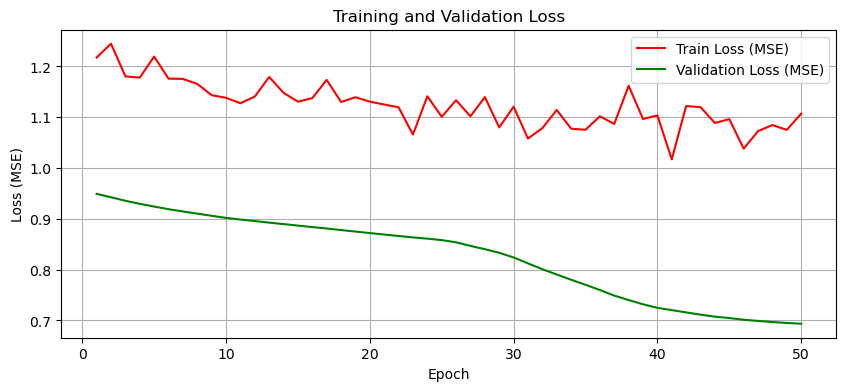

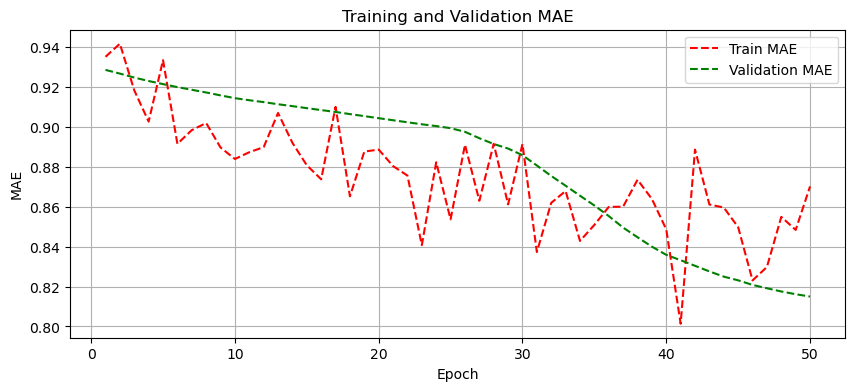

In [974]:
# Epoch range
epochs = range(1, epochs+1)

# ── Loss Plot ───────────────────
plt.figure(figsize=(10, 4))
plt.plot(epochs, train_losses, 'r-', label='Train Loss (MSE)')
plt.plot(epochs, val_losses, 'g-', label='Validation Loss (MSE)')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# ── MAE Plot ───────────────────
plt.figure(figsize=(10, 4))
plt.plot(epochs, train_maes, 'r--', label='Train MAE')
plt.plot(epochs, val_maes, 'g--', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()


In [975]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


best_model_path = r'C:\github_project_vscode\etri\pytorch_model\best_model.pt'

# 모델 구조 동일하게 선언되어 있어야 함
model = RobustTransformerRegressor().to(device)

checkpoint = torch.load(best_model_path, map_location=device)
model.load_state_dict(checkpoint)  # checkpoint는 바로 state_dict임!
model.eval()


# 1. 테스트셋 준비
X_test_tensor = torch.tensor(X_test_94, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test_94, dtype=torch.float32).to(device)

# 2. 예측 수행
model.eval()
with torch.no_grad():
    preds_scaled = model(X_test_tensor).cpu().numpy()  # 모델 출력값 (스케일된 값)
    y_test_scaled = y_test_tensor.cpu().numpy()        # 정답 (스케일된 값)

    # 3. 역변환
    preds = yscaler_94.inverse_transform(preds_scaled)
    y_true = yscaler_94.inverse_transform(y_test_scaled)

# 4. 스케일된 값 기준 성능
mae_scaled = mean_absolute_error(y_test_scaled, preds_scaled)
mse_scaled = mean_squared_error(y_test_scaled, preds_scaled)
r2_scaled = r2_score(y_test_scaled, preds_scaled)

# 5. 역변환된 값 기준 성능
mae = mean_absolute_error(y_true, preds)
mse = mean_squared_error(y_true, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, preds)

# 6. 출력
print("📉 [Scaled Output] (정규화 상태)")
print(f"MAE  : {mae_scaled:.4f}")
print(f"MSE  : {mse_scaled:.4f}")
print(f"R²   : {r2_scaled:.4f}")
print()
print("📊 [Inverse Transformed Output] (실제 단위)")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


📉 [Scaled Output] (정규화 상태)
MAE  : 1.2024
MSE  : 1.7242
R²   : 0.0807

📊 [Inverse Transformed Output] (실제 단위)
MAE  : 5.4439
MSE  : 35.3436
RMSE : 5.9451
R²   : 0.0807


C:\Users\kzxx1\AppData\Local\Temp\ipykernel_6196\4079648403.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(best_model_path, map_location=device

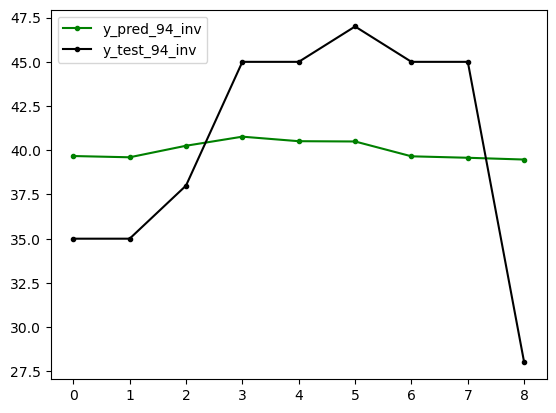

In [976]:
plt.plot(preds, 'g.-',label="y_pred_94_inv")
plt.plot(y_true, 'k.-',label="y_test_94_inv")
plt.legend()
plt.show()

In [977]:
data_95 = data_95.loc[:,['Part Number','D일 투입예정 수량(D일계획)','D+1일 투입예정 수량(Total)',
'D+2일 투입예정 수량(Total)','D+3일 투입예정 수량(Total)','D+4일 투입예정 수량(Total)',
'D+5일 투입예정 수량', 'D+6일 투입예정 수량','D+7일 투입예정 수량','D+8일 투입예정 수량',
'D+9일 투입예정 수량','D+10일 투입예정 수량','D+11일 투입예정 수량','D+12일 투입예정 수량',
'CRET_TIME']]

data_95['CRET_TIME'] = pd.to_datetime(data_95['CRET_TIME'], format="%Y%m%d%H%M")
data_95 = data_95.groupby(by=[data_95['CRET_TIME'].dt.year,
data_95['CRET_TIME'].dt.month,
data_95['CRET_TIME'].dt.day]).last()
data_95.reset_index(drop=True, inplace=True)
data_95 = data_95.loc[:, ['D일 투입예정 수량(D일계획)',
'D+3일 투입예정 수량(Total)',
'D+4일 투입예정 수량(Total)',
'D+5일 투입예정 수량'
]].reset_index(drop=True)

X_95, y_95 = to_timeseries_data(data_95)
X_train_95, X_val_95, X_test_95 = np.split(X_95, [int(0.7*len(X_95)), int(0.8*len(X_95))])
Xscaler_95 = StandardScaler()
X_train_95 = Xscaler_95.fit_transform(X_train_95.reshape(-1, X_train_95.shape[-1])).reshape(X_train_95.shape)
X_val_95 = Xscaler_95.transform(X_val_95.reshape(-1, X_val_95.shape[-1])).reshape(X_val_95.shape)
X_test_95 = Xscaler_95.transform(X_test_95.reshape(-1, X_test_95.shape[-1])).reshape(X_test_95.shape)

In [978]:
print("X 학습: {}, X 검증: {}, X 평가: {}".format(X_train_95.shape, X_val_95.shape, X_test_95.shape))

X 학습: (30, 3, 4), X 검증: (5, 3, 4), X 평가: (9, 3, 4)


In [979]:
X_train_both = np.concatenate([X_train_94, X_train_95], axis=2)
X_val_both = np.concatenate([X_val_94, X_val_95], axis=2)
X_test_both = np.concatenate([X_test_94, X_test_95], axis=2)
# 부품 94 + 부품 95
print("X 학습: {}, X 검증: {}, X 평가: {}".format(X_train_both.shape, X_val_both.shape, X_test_both.shape))

X 학습: (30, 3, 8), X 검증: (5, 3, 8), X 평가: (9, 3, 8)


- 하이퍼파라미터 수정이 필요한기는 하다. 

In [980]:
class CombinedTransformerRegressor(nn.Module):
    def __init__(self, input_dim=8, seq_len=3, d_model=4, nhead=2, num_layers=1, dim_feedforward=24, dropout=0.3):
        super().__init__()
        self.input_proj = nn.Sequential(
            nn.Linear(input_dim, d_model),
            nn.LayerNorm(d_model),
            nn.ReLU(),
            nn.Dropout(dropout)
        )
        self.pos_embedding = nn.Parameter(torch.randn(1, seq_len, d_model))
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.regressor = nn.Sequential(
            nn.Flatten(),
            nn.Linear(seq_len * d_model, 4),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(4, 2),
            nn.ReLU(),
            nn.Linear(2, 1)
        )

    def forward(self, x):
        x = self.input_proj(x) + self.pos_embedding
        x = self.transformer_encoder(x)
        return self.regressor(x)


In [981]:
import torch
import os

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CombinedTransformerRegressor().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()


# 우리는 y_94만 예측한다. 

X_train_tensor = torch.tensor(X_train_both, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_94, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val_both, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val_94, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_both, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test_94, dtype=torch.float32).to(device)

best_val_loss = float('inf')
best_model_path = './pytorch_model/best_combined_transformer.pt'

epochs = 100

# 손실 및 MAE 기록용 리스트
train_losses, val_losses = [], []
train_maes, val_maes = [] , []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_mae = mean_absolute_error(y_train_tensor.cpu().numpy(), output.detach().cpu().numpy())

    model.eval()
    with torch.no_grad():
        val_output = model(X_val_tensor)
        val_loss = criterion(val_output, y_val_tensor)
        val_mae = mean_absolute_error(y_val_tensor.cpu().numpy(), val_output.cpu().numpy())

    # 값 저장
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_maes.append(train_mae)
    val_maes.append(val_mae)

    # ⭐ 가장 좋은 성능일 때만 저장
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        torch.save(
            {'model_state_dict': model.state_dict(), 'best_val_loss': best_val_loss},
            best_model_path
        )
        print(f"✅ [Epoch {epoch}] Best model saved with val_loss: {best_val_loss:.4f}")

    if epoch % 2 == 0:
        print(f"[{epoch:03d}] Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f} | Train MAE: {train_mae:.4f}, Val MAE: {val_mae:.4f}")


✅ [Epoch 0] Best model saved with val_loss: 0.7212
[000] Train Loss: 1.1242, Val Loss: 0.7212 | Train MAE: 0.8982, Val MAE: 0.8157
✅ [Epoch 1] Best model saved with val_loss: 0.7150
✅ [Epoch 2] Best model saved with val_loss: 0.7084
[002] Train Loss: 1.2387, Val Loss: 0.7084 | Train MAE: 0.9413, Val MAE: 0.8061
✅ [Epoch 3] Best model saved with val_loss: 0.7026
✅ [Epoch 4] Best model saved with val_loss: 0.6979
[004] Train Loss: 0.9554, Val Loss: 0.6979 | Train MAE: 0.8079, Val MAE: 0.7987
✅ [Epoch 5] Best model saved with val_loss: 0.6933
✅ [Epoch 6] Best model saved with val_loss: 0.6888
[006] Train Loss: 1.2488, Val Loss: 0.6888 | Train MAE: 0.9141, Val MAE: 0.7918
✅ [Epoch 7] Best model saved with val_loss: 0.6854
✅ [Epoch 8] Best model saved with val_loss: 0.6829
[008] Train Loss: 1.0412, Val Loss: 0.6829 | Train MAE: 0.8403, Val MAE: 0.7871
✅ [Epoch 9] Best model saved with val_loss: 0.6805
✅ [Epoch 10] Best model saved with val_loss: 0.6775
[010] Train Loss: 0.9528, Val Loss: 0.

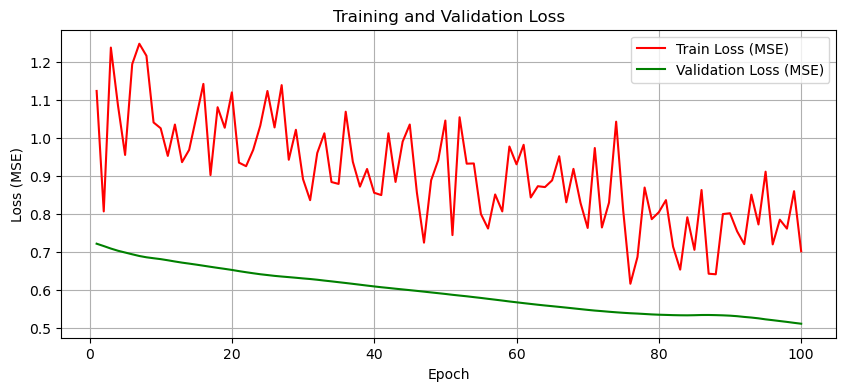

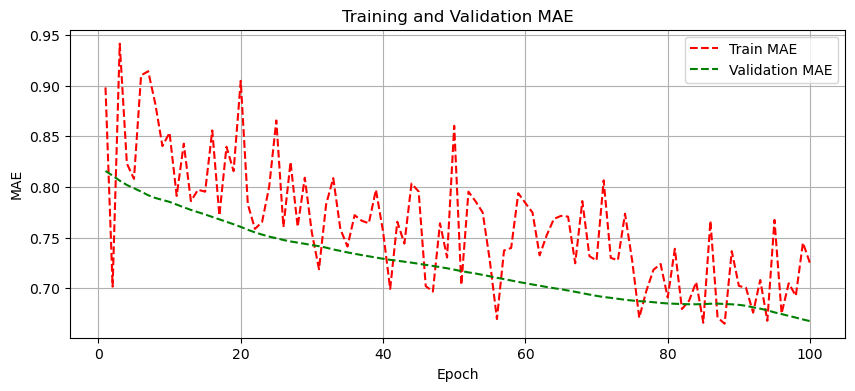

In [982]:
# Epoch range
epochs = range(1, epochs+1)

# ── Loss Plot ───────────────────
plt.figure(figsize=(10, 4))
plt.plot(epochs, train_losses, 'r-', label='Train Loss (MSE)')
plt.plot(epochs, val_losses, 'g-', label='Validation Loss (MSE)')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# ── MAE Plot ───────────────────
plt.figure(figsize=(10, 4))
plt.plot(epochs, train_maes, 'r--', label='Train MAE')
plt.plot(epochs, val_maes, 'g--', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()


In [983]:
import torch
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

best_model_path = r'C:\github_project_vscode\etri\pytorch_model\best_combined_transformer.pt'

# 모델 구조 동일하게 선언되어 있어야 함
model = CombinedTransformerRegressor().to(device)

# 저장된 best model 불러오기
checkpoint = torch.load(best_model_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# 예측 및 평가
with torch.no_grad():
    preds_scaled = model(X_test_tensor).cpu().numpy()      # 정규화(스케일) 상태 예측값
    y_test_scaled = y_test_tensor.cpu().numpy()            # 정규화(스케일) 상태 정답

    preds = yscaler_94.inverse_transform(preds_scaled)     # 역변환(실제 단위) 예측값
    y_true = yscaler_94.inverse_transform(y_test_scaled)   # 역변환(실제 단위) 정답

# 1. 정규화(스케일) 상태 기준
mae_scaled = mean_absolute_error(y_test_scaled, preds_scaled)
mse_scaled = mean_squared_error(y_test_scaled, preds_scaled)
r2_scaled = r2_score(y_test_scaled, preds_scaled)

print("📉 [Scaled Output] (정규화 상태)")
print(f"MAE  : {mae_scaled:.4f}")
print(f"MSE  : {mse_scaled:.4f}")
print(f"R²   : {r2_scaled:.4f}")
print()

# 2. 실제 단위(역변환) 기준
mae = mean_absolute_error(y_true, preds)
mse = mean_squared_error(y_true, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, preds)

print("📊 [Inverse Transformed Output] (실제 단위)")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


📉 [Scaled Output] (정규화 상태)
MAE  : 1.1295
MSE  : 1.7241
R²   : 0.0807

📊 [Inverse Transformed Output] (실제 단위)
MAE  : 5.1141
MSE  : 35.3422
RMSE : 5.9449
R²   : 0.0807


C:\Users\kzxx1\AppData\Local\Temp\ipykernel_6196\2071261716.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(best_model_path, map_location=device

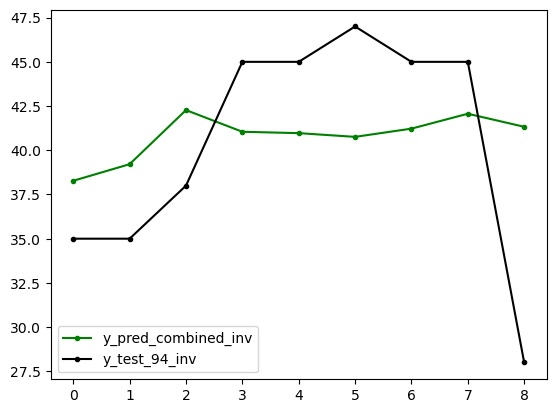

In [984]:
plt.plot(preds, 'g.-',label="y_pred_combined_inv")
plt.plot(y_true, 'k.-',label="y_test_94_inv")
plt.legend()
plt.show()